In [1]:
import pandas as pd
import os

PROJ_ROOT = os.path.join(os.pardir)

import gensim

from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel


import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import operator

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm

import numpy as np


data_path = os.path.join(PROJ_ROOT, 
                         'data')
from pprint import pprint
import re
import pickle
import matplotlib.pyplot as plt

## Load Necessary Files

In [2]:
files = ['all_tokens.pkl','tweets_gdict.pkl','corpus.pkl',
         'texts.pkl']

for fn in tqdm(files):
    var=re.findall(r'(.*)\.',fn)[0]
    globals()[var] = pickle.load( open( data_path+'\\'+fn, 'rb' ) )

  0%|          | 0/4 [00:00<?, ?it/s]

## LDA Topic Modeling

### functions to computer coherence and make the lda models

In [3]:
# create a function to compute coherence values - used for the naive models
def compute_coherence(dictionary, corpus, texts, limit, start=2, step=1):
    '''Function to create a naive LDA model for a range of topics, then compute coherence values'''
    # empty lists to hold the models & computed coherence values
    coherence_values=[]
    model_list=[]
    
    # create a LDA model for each topic amount set between start & limit values
    for num_topic in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus,
                         num_topics=num_topic,
                         id2word=dictionary,
                         random_state=5)
        
        model_list.append(model) # add the model to the list
        
        # create a coherence model from the model
        coherencemodel=CoherenceModel(model=model,
                                      texts=[texts],
                                      dictionary=dictionary,
                                      coherence='c_v')
        
        #add the coherenced values from the list
        coherence_values.append(coherencemodel.get_coherence()) 
        
    return model_list, coherence_values


def compute_coherence_values(corpus, dictionary, texts, k, a, b):
    '''Function to create a lda model with set parameters, then compute coherence values'''
    lda_model = gensim.models.LdaMulticore(corpus=tqdm(corpus),
                                           id2word=dictionary,
                                           num_topics=k,
                                           alpha=a,
                                          chunksize=200,
                                          passes=10,
                                          random_state=5,
                                          eta=b,
                                          per_word_topics=True)
    
    # create a coherence value from the model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=[texts],
                                         dictionary=dictionary,
                                         coherence='c_v')
    
    return lda_model, coherence_model_lda.get_coherence()


## Create a naive lda model with 1 to *n* topics

In [4]:
# #create a naive  lda model and coherence values for different topic lengths
# model_list, coherence_values = compute_coherence(dictionary=tweets_gdict,
#                                                  corpus=corpus,
#                                                  texts=texts,
#                                                  start=1,
#                                                  limit=15,
#                                                  step=1  )

In [5]:
# # save the naive models

# with open(data_path+'\\'+'naive_model_list_cv.pkl', 'wb') as f:
#     pickle.dump(model_list, f)
    
# with open(data_path+'\\'+'coherence_values.pkl', 'wb') as f:
#     pickle.dump(coherence_values, f)

#### Load the previously created models from the above two cells

In [6]:
model_list = pickle.load( open(data_path+'\\'+ 'naiave_model_list_cv.pkl', 'rb' ) )
coherence_values = pickle.load(open(data_path+'\\'+ 'coherence_values.pkl','rb'))

### Visualize coherence values to select number of topics to use for the LDA Model

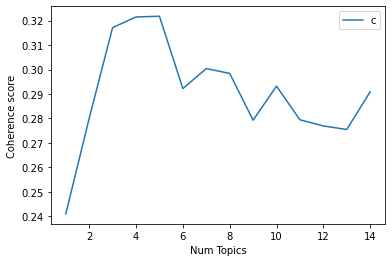

In [19]:
#plot the coherence values for different topic numbers
limit=15; start=1
x=range(start, limit)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend('coherence_values', loc='best')
plt.savefig('coherence_values.png', bbox_inches='tight')
plt.show()

In [8]:
#print the coherence values, and the index & cv for the highest cv value
pprint(coherence_values)
index, value = max(enumerate(coherence_values), key=operator.itemgetter(1))
num_topics = len(coherence_values[:index+1])
print(index, value)
print(num_topics,' topics will be used for the LDA model')

[0.2409125597912077,
 0.2800806042947272,
 0.3171639175987016,
 0.3215055649681553,
 0.32179694064705433,
 0.2921852213487059,
 0.30038541763491633,
 0.2984128495380771,
 0.27927221557560233,
 0.2932006816855416,
 0.2794232567110878,
 0.2769115091589724,
 0.27545853819011845,
 0.29085384301829936]
4 0.32179694064705433
5  topics will be used for the LDA model


## Create a tuned LDA Model with 3 topics

In [9]:
# #decide on a topic number from above and train hyperparamters to train the model on

# topic_range = [3] # value determined by the above elbow plot above

# # range of alpha numbers to plug into the model   
# alpha = list(np.arange(0.01, 1, 0.3)) + [50/x  for x in topic_range]
# alpha.append('symmetric')
# alpha.append('asymmetric')

# # range of beta parameters to plug into the model
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# # create a minimized corpus set for validation if needed
# num_of_docs = len(corpus)
# corpus_sets = [corpus]
    
# corpus_title = ['100% Corpus']

# # empty dictionary to store parameter results with coherence values
# model_results = {'validation_set': [],
#                     'topics':[],
#                     'alpha':[],
#                  'beta':[],
#                   'coherence':[]}

# models=[] #empty list to store completed models
    
# if 1 ==1:
#     pbar = tqdm(total=len(topic_range) * len(alpha) * len(beta) * len(corpus_sets))
    
    
#     # create a model and store the corresponding values and results for each combination of parameters
#     for i in range(len(corpus_sets)):
#         for k in topic_range:
#             for a in alpha:
#                 for b in beta:
                    
#                     model, cv = compute_coherence_values(corpus=corpus_sets[i],
#                                                   dictionary=tweets_gdict,
#                                                      texts=texts,
#                                                   k=k,
#                                                   a=a,
#                                                         b=b)
                    
#                     model_results['validation_set'].append(corpus_title[i])
#                     model_results['topics'].append(k)
#                     model_results['alpha'].append(a)
#                     model_results['beta'].append(b)
#                     model_results['coherence'].append(cv)
#                     models.append(model)
                    
#                     pbar.update(1)

#     pbar.close()

#### Load the models from the above cell

In [10]:
models = pickle.load( open( data_path+'\\'+ 'all_lda_models_3t.pkl', 'rb' ) )
model_results = pickle.load(open(data_path+'\\'+ 'model_results_3t.pkl','rb'))

## Find and save the best model

In [11]:
#create a df of the param values and results
lda_tuning = pd.DataFrame(model_results)
lda_tuning.head()

,validation_set,topics,alpha,beta,coherence
0,100% Corpus,3,0.01,0.01,0.307912
1,100% Corpus,3,0.01,0.31,0.336507
2,100% Corpus,3,0.01,0.61,0.345389
3,100% Corpus,3,0.01,0.91,0.350273
4,100% Corpus,3,0.01,symmetric,0.336676


In [12]:
# find the row with the coherence value and display the parameters
idx =lda_tuning['coherence'].idxmax(axis=0)
lda_tuning.iloc[idx]

validation_set    100% Corpus
topics                      3
alpha                    0.01
beta                     0.91
coherence            0.350273
Name: 3, dtype: object

In [13]:
#create a df with the optimally tuned params
tuned_params = pd.DataFrame(lda_tuning.iloc[idx])
tuned_params.columns=['vals']
tuned_params.index.name='hp_params'
tuned_params.to_csv(data_path+'\\'+'tuned_lda_params_3t.csv', index=False)

In [14]:
# # save the tuned model
# with open(data_path+'\\'+'lda_best_tuned_model_3t.pkl', 'wb') as f:
#                 pickle.dump(models[idx], f)

# #save all of the models       
# with open(data_path+'\\'+'all_lda_models_3t.pkl', 'wb') as f:
#                 pickle.dump(models, f)

# # save all of the tuned model parameters
# with open(data_path+'\\'+'model_results_3t.pkl', 'wb') as f:
#                 pickle.dump(model_results, f)

## Display the top words from each topic

In [15]:
#display the topics along with the top 15 words for each topic
pprint(models[idx].print_topics(num_words=15))

[(0,
  '0.064*"vaccine" + 0.058*"coronavirus" + 0.013*"j&;j" + 0.013*"pfizer" + '
  '0.011*"dose" + 0.007*"johnson_johnson" + 0.006*"moderna" + '
  '0.005*"pfizer_moderna" + 0.005*"new" + 0.004*"study" + 0.004*"shoot" + '
  '0.004*"variant" + 0.004*"mrna" + 0.003*"virus" + 0.003*"fda"'),
 (1,
  '0.059*"coronavirus" + 0.033*"vaccine" + 0.013*"dose" + 0.010*"vaccinate" + '
  '0.009*"vaccination" + 0.006*"coronavirus vaccine" + 0.005*"today" + '
  '0.005*"receive" + 0.005*"state" + 0.004*"week" + 0.004*"people" + '
  '0.004*"death" + 0.004*"update" + 0.004*"case" + 0.004*"new"'),
 (2,
  '0.036*"coronavirus" + 0.025*"vaccine" + 0.018*"vaccinate" + 0.011*"people" '
  '+ 0.009*"get" + 0.009*"pandemic" + 0.009*"virus" + 0.006*"vaccination" + '
  '0.005*"need" + 0.005*"vax" + 0.004*"know" + 0.004*"time" + 0.004*"want" + '
  '0.004*"like" + 0.003*"work"')]


## Visualize the LDA model

In [16]:
#display the pLDAvis plot to visualize the LDA model
vis = pyLDAvis.gensim.prepare(models[idx], corpus, tweets_gdict)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.134614  0.065198       1        1  61.253024
1      0.001348 -0.128476       2        1  23.766745
0     -0.135962  0.063278       3        1  14.980230, topic_info=             Term          Freq         Total Category  logprob  loglift
23        vaccine  21680.000000  21680.000000  Default  30.0000  30.0000
6     coronavirus  29963.000000  29963.000000  Default  29.0000  29.0000
1122       pfizer   2545.000000   2545.000000  Default  28.0000  28.0000
37           dose   3849.000000   3849.000000  Default  27.0000  27.0000
781          j&;j   1339.000000   1339.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
427         virus    313.720713   4039.772916   Topic3  -5.7617  -0.6570
1490    available    201.486304    580.424550   Topic3  -6.2045   0.8404
102         datum    207.843470    762.063187   Topic3  -6.1734   0.5992
89       pandemic    216.002340   4286.167265   Topic3  -6.1349  -1.0894
295          news    199.501146    796.103412   Topic3  -6.2144   0.5145

[224 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
24        1  0.524647        $
24        2  0.022632        $
24        3  0.452637        $
4406      1  0.009874    $_jnj
4406      2  0.009874    $_jnj
...     ...       ...      ...
341       2  0.491983        |
341       3  0.506835        |
1588      1  0.008878  ░_░_░_░
1588      2  0.985504  ░_░_░_░
1588      3  0.008878  ░_░_░_░

[519 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [18]:
pyLDAvis.save_html(vis,data_path+'\\'+'covid_topics_3t.html')